<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2021 Final Exam Coding
***

This exam coding segment is due on Canvas by **11:59 PM on Tuesday December 14*. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  


Note: There are a number of images in this problem.  If you can't get them to display properly, they are hosted [here](https://drive.google.com/drive/folders/1M4kBMd23roiDVnfbYQmPmzsR1bPZAxzX?usp=sharing).  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be a bit less helpful than we typically are with homework. For example, we will not check answers, significantly debug your code, and so on.  But please don't feel like you're totally alone on this: feel free to ask questions or ask for help, and we will decide how best to provide that assistance.
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
5. You may **NOT** post to message boards or other online resources asking for help.
6. You may **NOT** copy-paste solutions *from anywhere*.
7. You may **NOT** collaborate with classmates or anyone else.
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this exam coding assignment or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**NOTES**: 

- You may not use late days on the exam coding nor can you drop your exam coding grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a exam coding clarifications thread. (NB: you should use public posts for the epidemiology "warmup" prompts).
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. The exam coding assignmnet is designed to be completed using only the packages in the first given code cell.
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p2) | [Bottom](#bot)

---

In [ ]:
import numpy as np 
import pandas as pd 
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pylab as plt 
from patsy import dmatrices
import seaborn as sns
import itertools
%matplotlib inline

#imported variance_inflation_factor

<br>

---
[Back to top](#top)
<a id='p1'></a>

## [30 points] Problem 1: Automating a fit

** 1 A: Here's some data!**

Load the data in `not_so_linear.csv` and create an (x,y) scatter plot of it.  

The data come from a  NIST study, where the variable `y` is ultrasonic response when subjected to `x` of metal distance.

It's pretty clear that $y$ is **a** function of $x$, but it's not a straight line!  So we may want to ask: what is the **best** polynomial of the form $$y=\beta_0+\beta_1\cdot x +\beta_2\cdot x ^2 +\beta_3\cdot x ^3 +\dots +\beta_n\cdot x^n$$
to capture the data.



In [21]:
#plot data here.
df=pd.read_csv('../data/not_so_linear.csv')
df.head()

,y,x
0,92.9,0.500
1,78.7,0.625
2,64.2,0.750
3,64.9,0.875
4,57.1,1.000


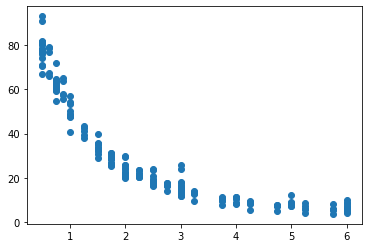

In [24]:
y, xTv = dmatrices('y ~ x', data = df)
lml = sm.OLS(y,xTv).fit()
plt.scatter(x="x",y="y", data = df)



** 1 B: find the best polynomial fit **

Our goal is to find how many powers of $x$ we need to capture the curve well.  Recall that if we add extra *predictors* or powers of $x$ to a model the SSE and $R^2$ of that model will always appear better.  But at some point, they don't improve by enough to be "worth" the extra terms in the model.

Write a function `best_poly(df)` with the following usage:
- Argument: the original data frame `df` with columns `y` and `x`
- Your function should return a stats.OLS.fit() argument that corresponds to the **best** fit $y=X\beta$ according adjusted $R^2$ where you consider including up to 10 powers of X.  

In other words, your function should fit **all 11** of the linear models 

Model 0: $y=\beta_0$, 

Model 1: $y=\beta_0+\beta_1x^1$, 

Model 2: $y=\beta_0+\beta_1x^1+\beta_2x^2$, 

$\vdots $

Model 10: $y=\beta_0+\beta_1x^1+\beta_2x^2+\dots+\beta_{10}x^{10}$


and then `return` the one with the best adjusted R-squared.

In [25]:
def best_poly(dfi):
    x = dfi['x']
    y = df['y']
    R = []
    for i in range(1,11):
        Col = [x]
        for j in range(2,i):
            Col.append(x**j)
            
        X = np.column_stack(Col)
        X = sm.add_constant(X)
        polyModel = sm.OLS(y,X).fit()
        R.append(polyModel.rsquared_adj)
        if(i>3):
            if((R[i-1]-R[i-2])<.05): #if the difference in R^2 is less than .05
                print(i, "th Is is a good fit with the difference in adjusted R^2 being less than .05")
                return(polyModel)
    
winninglm=best_poly(df)


4 th Is is a good fit with the difference in adjusted R^2 being less than .05


**1 C: Visualize your results**

For the best model by adjusted R-squared, print the `summary()` table and make a plot with the overlay the resulting fitted line over the data.  Does it appear as though we appropriately captured the structure of the data?

**Note:** Even if you can't get the function to "automate" the best polynomial in 1B, you should be able to do this part by hand if you need it!

In [26]:
winninglm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     2646.
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.67e-166
Time:                        20:55:33   Log-Likelihood:                -588.91
No. Observations:                 214   AIC:                             1186.
Df Residuals:                     210   BIC:                             1199.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.6131      1.313     80.464      0.000     103.026     108.201
x1           -67.0762      1.866    -35.955      0.000     -70.754     -63.399
x2            15.7433      0.704     22.369      0.000      14.356      17.131
x3            -1.2288      0.074    -16.574      0.000      -1.375      -1.083
==============================================================================
Omnibus:                       43.571   Durbin-Watson:                   1.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.496
Skew:                           0.882   Prob(JB):                     2.26e-25
Kurtosis:                       6.101   Cond. No.                         670.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

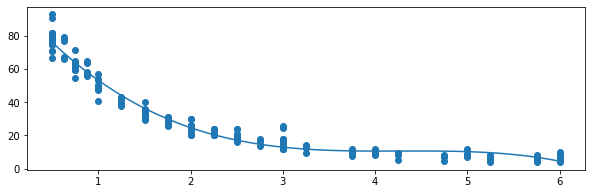

In [27]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 3))

xPlot = np.linspace(np.min(df['x']), np.max(df['x']))
yPlot = np.zeros(len(xPlot))

for k, B in enumerate(winninglm.params):
    yPlot += B*xPlot**k

plt.scatter(x="x",y="y", data = df)
plt.plot(xPlot,yPlot)

<br>

---
[Back to top](#top)
<a id='p2'></a>

## [30 points] Problem 2: Testing for Streaks

One measure we're often interested in for modeling is whether or not our data is exhibiting patterns, where nearby observations behave similarly to one another.  We explored one case of this briefly in the last problem of HW9, and to date have used simple plots of residuals to determine whether not the exhibit clumping, where positive and negatively signed residuals tend to appear in grouping of the same type.  In practice, this is quite common whenever one of your $X$ *predictor* variables is either **location** or **time**, since nearby data points in either of those tend to have similar errors.

In this problem we'll explore a simplified variant of a common diagnostic for whether or a not a list of number is exhibiting streakiness in the clumping of positive and negative values, the [Wald-Wolfowitz Runs Test](https://en.wikipedia.org/wiki/Wald%E2%80%93Wolfowitz_runs_test).  I recommend skimming the link before you start.

Instead of the exact statistic of the Wald test, we're going to come up with two other measures to create a hypothesis test of whether or not a list of signed numbers are exhibiting regular amounts of clumping or not.  Before we can create any kind of hypothesis test, we should write a function to count the runs in a list of numbers.



** 2 A: Implementing some statistics**

    
Implement a function `count_runs` that takes a list (with length at least 2) of `float` values.  It should return `count, longest`, where

- `count`: The number of distinct + or - runs in that list
- `longest`:The length of the single longest streak of same-signed values in the list

For general implementation:
- You should count `0` as positive
- You may find it easier to convert your list of floats into 0 and 1 or True and False to denote positive/negative.  This is optional.
- There are a number of ways to do this.  Given below is some example syntax via `itertools` (groupby).  You may also extract information from e.g. numpy's argsort, but don't import any packages not already in the header.  If your implementation is inefficient, you may find the later parts of this problem take a long time to run.


In [28]:
#example usage for itertools.groupby on "signs" (NOT FLOATS)
np.random.seed(2020)
binarylist=np.random.choice(['+', '-'], size=14)
print('Simulated signs:', binarylist)
counts = np.array([(item, len(list(objects))) for item, objects in itertools.groupby(binarylist)])
counts

#your goal is to extract:
#the number of distinct runs (looks like 7!)
#the length of the longest run (looks like 5!)

Simulated signs: ['+' '+' '-' '+' '-' '-' '-' '-' '-' '+' '-' '+' '+' '+']


array([['+', '2'],
       ['-', '1'],
       ['+', '1'],
       ['-', '5'],
       ['+', '1'],
       ['-', '1'],
       ['+', '3']], dtype='<U1')

In [29]:
def count_runs(x):
    #Do the thing!  Make sure 'x' can be floats, unlike the dummy example above
    count1 = []
    for i in x:
        if i < 0:
            count1.append('-')
        else:
            count1.append('+')
    counts = np.array([(item, len(list(objects))) for item, objects in itertools.groupby(count1)])
    longest = max(counts[0])
    count = len(counts)
    return count, int(longest)

** 2 B: Trying out the statistic.**

Try out your statistic on a few quick test cases to make sure it's working.

Some examples to sanity check your function.

- An input of [3,3,1,-1,-2] should return (2,3), since there are 2 runs (3 positive number then 2 negative numbers) the longest of which is the first 3.
- An input of [1,-1,1,-1,1,-1] should return (6,1).
- An input of [1,1,1,1,1,1] should return (1,6).


In [30]:
print(count_runs([3,3,1,-1,-2]))
print(count_runs([1,-1,1,-1,1,-1]))
print(count_runs([1,1,1,1,1,1] ))

(2, 3)
(6, 1)
(1, 6)


**2 C : Hypothesis Testing Setup**

Our goal is to take the output of a regression model - usually in our `.resid` object - and decide whether or not the residuals are clumping or not.  State the null and alternative hypothesis for a test that presumes that the residuals are unpatterned, and rejects this only if there is significant statistical evidence to the contrary.

$H_0$ : Residuals have no correlations and therefore are not clumped at all.

$H_a$ : Residuals have have some correlation and are clumped.

**2 D : Hypothesis Testing Simulations**

We can use the `count_runs` function to determine a reasonable set of values for longest run and number of runs.  In other words: we need a rejection region for our test.  Simulate 1000 batches of 214 $N(0,1)$ random variables.  For each of the 1000 batch, compute the `count_runs` statistics of longest run and number of runs.

Visualize the distributions of both statistics into side-by-side histograms.

Then describe a **rejection region** for the the two-tailed $\alpha=0.03$ hypothesis test from part 2C.

(array([0.69      , 0.11818182, 0.04818182, 0.02454545, 0.01545455,
        0.00818182, 0.00272727, 0.00090909, 0.        , 0.00090909]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <a list of 10 Patch objects>)

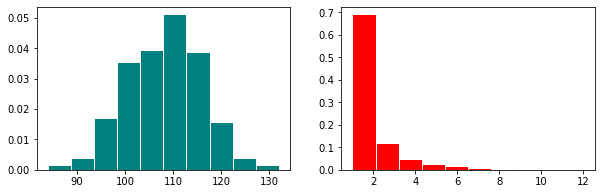

In [31]:
sims = [count_runs(np.random.choice([-1,1], size=214)) for i in range(0,1000)]

df2 = pd.DataFrame(sims, columns =['Count','Longest'])

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

axes[0].hist(df2['Count'], color = 'teal', edgecolor = 'white', density = True)
axes[1].hist(df2['Longest'], color = 'red', edgecolor = 'white', density = True)




$ \mu = \frac{2*N_+*N_-}{N}+1$

$ Z =  \frac{Z_a - \mu}{\sigma} $

Hypothesis region : $ -Z_\frac{a}{2} < \mu < Z_\frac{a}{2} $

**2 E : Apply your test**

Consider performing simple linear regression $y=\beta_0+\beta_1x$ for the `not_so_linear.csv` data from problem 1.  If we were to apply a runs rest to the residuals (`.resid`) from this model, what values do we get from `count_runs`?  Are they within the rejection region?  Should they be?

**Note:**  You'll need to make sure you sort the data by increasing x before you apply this, because for regression we look for clumping of signs as the preditor increases!

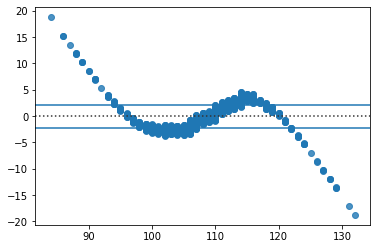

In [32]:
Xsort = np.sort(df2['Count'])
Xbar = np.mean(df2['Count'])
#sns.scatterplot(x=Xsort, y=np.linspace(min(df2['Count']),max(df2['Count']), len(df2['Count'])))


Zone1 = stats.norm.ppf(1-.03/2)
Zone2 = -Zone1

plt.axhline(y=Zone1, label = 'Data Mean')
plt.axhline(y=Zone2, label = 'Data Mean')


sns.residplot(x=Xsort ,y=np.linspace(min(df2['Count']),max(df2['Count']), len(df2['Count'])),data = df2)


The mean of the data falls within the rejection region as expected as due to random chance and large amounts of data I can expect that the sample mean should get closer and closer to expected mean as sample size increases.

<br>

---
[Back to top](#top)
<a id='p3'></a>

## [40 points] Problem 3: Multiple Linear Regression

Load the data set in `houses`, with an opening snipper below.  The data includes sale prices of 24 houses from a midwetern town in the 1970's.   You are told that you need to quantify how price can be explained and predicted by the feature of the house.

The variables available in the data set are labeled as follows:

* sales:    the sales price of the house (in 1000s of dollars)
* tax: 	    the local taxes
* bath: 	the number of bathrooms
* lot: 	    the lot size (1000s of ft)
* size: 	the living space (1000s of ft)
* garage: 	number of parking spots in the garage
* rooms: 	number of rooms
* bedrooms: number of bedrooms
* age: 	    age in years
* fire: 	number of fireplaces


In [33]:
dfhouse=pd.read_csv('../data/houses.txt', delimiter = "\t")
dfhouse.columns=['tax','bath','lot','size','garage','rooms','bedrooms','age','fire','sales']
dfhouse.head()


,tax,bath,lot,size,garage,rooms,bedrooms,age,fire,sales
0,4.918,1.0,3.472,0.998,1.0,7,4,42,0,25.9
1,5.021,1.0,3.531,1.500,2.0,7,4,62,0,29.5
2,4.543,1.0,2.275,1.175,1.0,6,3,40,0,27.9
3,4.557,1.0,4.050,1.232,1.0,6,3,54,0,25.9
4,5.060,1.0,4.455,1.121,1.0,6,3,42,0,29.9


** Part 3 A: Explore**

Make pairwise scatter plots of the continuous predictors/covariates, both against each other and against the outcome (expenditures).   Does the relationship between the independent variables and the dependent variables appear to be linear?  Do there appear to be independent variables that are collinear?

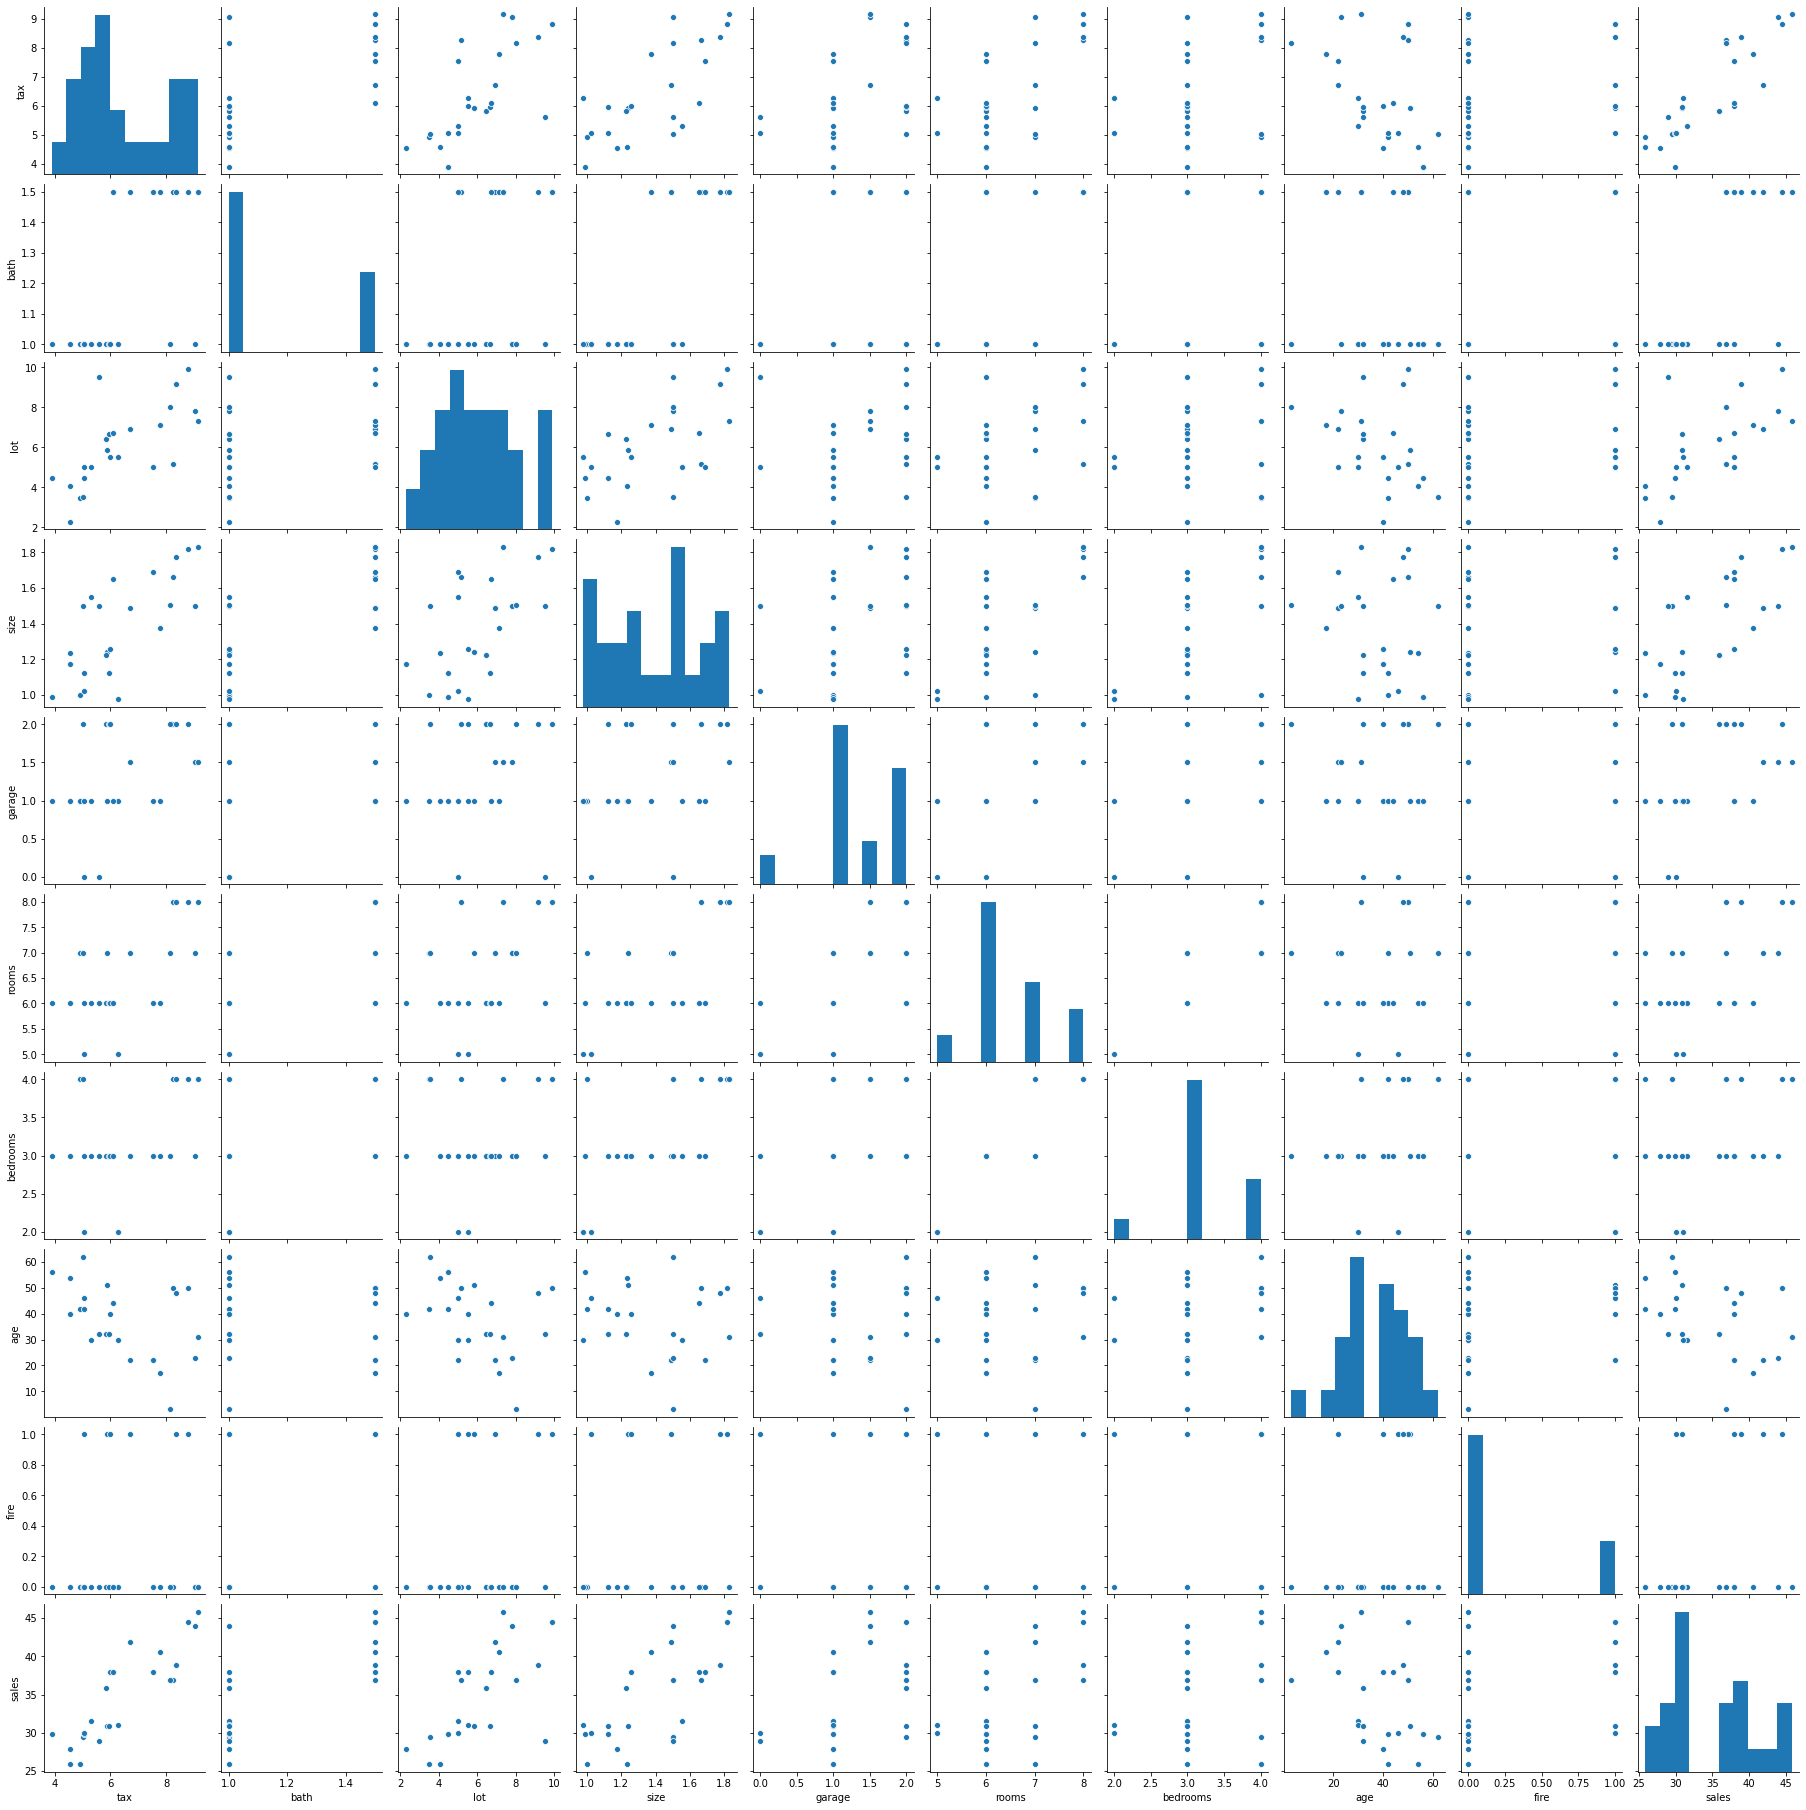

In [34]:
sns.pairplot(dfhouse)

The strongest relationships are mostly connected throught sales.  

The strongest coralations with sales are clearly tax, bath, lot, size, and rooms.  

Fire, garage, and bedrooms also appear to be correlated but not to as strong of a degree that the others are. 

Lastly the only variable that is negativly correlated seems to be age.

** Part 3 B: Make a Model**

By adding columns to a minimal model or by subtracting columns from the full model, use one of the criteria in the class to create a reasonable candidate model.  These may include:

- stepwise optimization of adjusted $R^2$
- stepwise inclusion/removal of most or least-significant T-tests on coefficients
- removing columns based on VIFs

Use a markdown cell to explain exactly what method you're using to construct your model.

In [35]:
features = "+".join(set(dfhouse.columns) - set('sales'))
y, X = dmatrices('sales ~' + features, dfhouse, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, j) for j in range(X.shape[1])]
vif["features"] = X.columns

Col = []
    
vif.round(1)
for i in range(0,11):
    if(vif['VIF Factor'][i] >= 2.5 and vif['VIF Factor'][i] < 10 and vif['features'][i] != 'sales'):
        print(vif['VIF Factor'][i].round(1),vif['features'][i])
        Col.append(vif['features'][i])
        
print(Col)
y = dfhouse['sales']
X = dfhouse[Col] 

X = sm.add_constant(X)

Model = sm.OLS(y,X).fit()

Model.summary()

9.8 bedrooms
3.9 size
3.3 bath
8.8 tax
['bedrooms', 'size', 'bath', 'tax']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     20.23
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           1.23e-06
Time:                        20:56:47   Log-Likelihood:                -56.676
No. Observations:                  24   AIC:                             123.4
Df Residuals:                      19   BIC:                             129.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1989      3.817      3.196      0.005       4.209      20.189
bedrooms      -1.4170      1.309     -1.083      0.292      -4.156       1.322
size           2.1425      4.043      0.530      0.602      -6.320      10.605
bath           6.1106      3.770      1.621      0.122      -1.780      14.001
tax            2.6268      0.582      4.516      0.000       1.409       3.844
==============================================================================
Omnibus:                        1.907   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.385   Jarque-Bera (JB):                1.471
Skew:                           0.426   Prob(JB):                        0.479
Kurtosis:                       2.136   Cond. No.                         61.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Sales, bedroom, tax, size and bath all have a variance inflation factor over 3 so these are the collumns are the ones im going to keep in my new model.

** Part 3 C: Validate your Model**


Perform a thorough discussion of the underlying regression assumptions of your model in part 1B.  You should plot a predictor vs. residuals plot for each column and histogram OR qqplot of the overall residuals.  Make sure to also check for non-linearity.

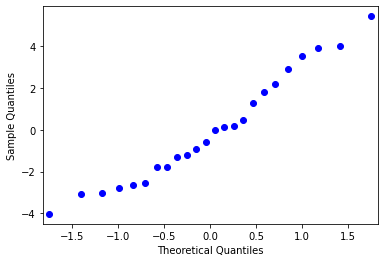

In [36]:
res = Model.resid
fig = sm.qqplot(res)

The relationship between the Expected and the Sample are pretty well alined,  The $R^2$ is only at around .77 so we need to find a way to make this better.

My guess is that its non linear, from this point of veiw it very well could be, but its worth trying, aswell as trying to see if removing/adding columns will help.

** Part 3 D: Tune your Model**


Based on your work in parts 1B and 1C, **iterate** on your model.  Consider removing terms or adding higher-order polynomials one at a time unless you are satisfied that your model captures the data as well as possible.  Each time you add or subtract a term from your model, you should repeat the steps in parts B and C: a summary table and exploration of assumptions.

In [40]:
Col = ['tax','size','bath','bedrooms'] 
# I used this to test to see if removing any of these columns would increase
#adj R^2, None did

y = dfhouse['sales']

x = dfhouse[Col]

X = np.column_stack((x, x**2, x**3, x**4))

X = sm.add_constant(X)

Model = sm.OLS(y,X).fit()

res = Model.resid

Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     10.80
Date:                Tue, 14 Dec 2021   Prob (F-statistic):           0.000130
Time:                        20:57:27   Log-Likelihood:                -47.928
No. Observations:                  24   AIC:                             119.9
Df Residuals:                      12   BIC:                             134.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        171.7701    146.528      1.172      0.264    -147.488     491.028
x1          -332.2458    196.656     -1.689      0.117    -760.723      96.231
x2         -1200.4310   2609.157     -0.460      0.654   -6885.296    4484.434
x3           142.5138    121.493      1.173      0.264    -122.197     407.224
x4           220.4463    188.080      1.172      0.264    -189.345     630.237
x5            81.5611     46.256      1.763      0.103     -19.222     182.345
x6          1422.6691   2860.068      0.497      0.628   -4808.883    7654.222
x7            98.6295     83.940      1.175      0.263     -84.260     281.519
x8           167.3668    142.879      1.171      0.264    -143.940     478.674
x9            -8.6275      4.721     -1.828      0.093     -18.913       1.658
x10         -725.7984   1376.242     -0.527      0.608   -3724.373    2272.776
x11           32.8029     27.611      1.188      0.258     -27.357      92.962
x12         -102.8218     87.487     -1.175      0.263    -293.439      87.795
x13            0.3345      0.177      1.892      0.083      -0.051       0.720
x14          134.9490    245.366      0.550      0.592    -399.657     669.555
x15          -65.9369     56.886     -1.159      0.269    -189.880      58.006
x16           13.7791     11.704      1.177      0.262     -11.723      39.281
==============================================================================
Omnibus:                        0.371   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.831   Jarque-Bera (JB):                0.525
Skew:                          -0.182   Prob(JB):                        0.769
Kurtosis:                       2.374   Cond. No.                     4.98e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.65e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

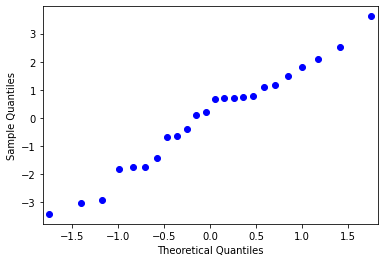

In [39]:
fig = sm.qqplot(res)

** Part 3 E: Explain your Model**

**Justify** your choices: there are a lot of ways to choose a "best" model: we've mentioned e.g. only including significant predictors versus F-tests versus optimizing R-squared.  Explain what terms you chose and why they were appropriate! 

After attempting to remove and add a few columns the Rsquared was already at the best I could get it.  

From there I attempted to change the order and I found that $x^4$ was able to maximize $R^2$ without needed to increase the number of polynomials to an unreasonable number.

Rubric notes:

This problem is by design very open-ended.  It is meant to reflect a real-world problem solving process.  For this problem, at the very least, you should:
- Include and explain which method you're using to removel redundant columns in part B
- Include a sentence for **each** of the diagnositic plots in part C, determining whether your current model is meeting the standard assumptions of multiple linear regression
- Include some code, sentences, and/or visualizations demonstrating what alternative models you tried and/or considered.
- Include a sentence interpreting why your final model **makes sense** in the context of the problem - and it if doesn't, you'll want to try to explain why not.

Graders will look for the both the diagnostic plots and **plenty** of complete English sentences describing what you're doing and why you think it will help answer the data science question: how do we create the best model we can to quantify how price can be explained and predicted by the features of the house.

<br>

---

[Back to top](#top)
<a id='bot'></a>